In [1]:
import pandas as pd
import psycopg2
from flask import Flask, request
import matplotlib.pyplot as plt

connection = psycopg2.connect(host = 'database-1.cth04qnbqozs.us-east-2.rds.amazonaws.com', user = 'postgres',
                       password = 'postgres', port = '5432')

cursor = connection.cursor()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


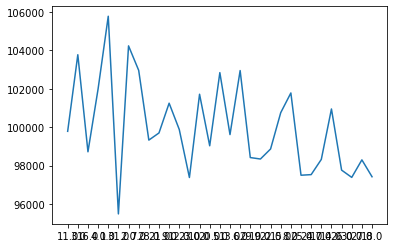

127.0.0.1 - - [26/Feb/2020 11:54:43] "GET /births/ex3/10 HTTP/1.1" 200 -


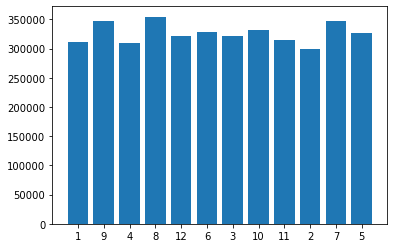

127.0.0.1 - - [26/Feb/2020 11:54:57] "GET /births/ex1 HTTP/1.1" 200 -


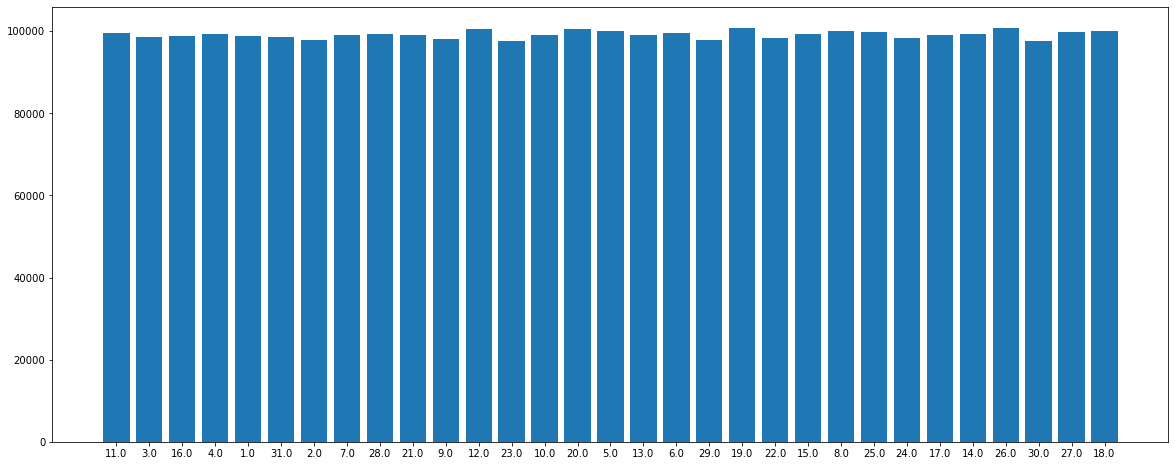

127.0.0.1 - - [26/Feb/2020 11:55:06] "GET /births/ex2 HTTP/1.1" 200 -


In [4]:
app = Flask(__name__)

@app.route('/births/<url>', methods = ['GET'])

def ex_1_2(url):
    
    if url == 'ex1':
    
        cursor.execute('SELECT year, SUM(births) AS "nascimentos" FROM brths GROUP BY year ORDER BY nascimentos DESC;')
        recs = cursor.fetchall()
        sql = "SELECT SUM(births), month FROM brths WHERE year = '{}' GROUP BY month".format(recs[0][0])
        df = pd.read_sql(sql, connection)
        plt.bar(df['month'], df['sum'])
        plt.show()
        
        return recs[0][0], 200

    if url == 'ex2':
        
        cursor.execute("SELECT month, SUM(births)FROM brths WHERE gender = 'F' GROUP BY month ORDER BY sum DESC;")
        recset = cursor.fetchall()
        sql = "SELECT SUM(births), day FROM brths WHERE month ='{}' AND gender = 'F' GROUP BY day;".format(recset[0][0])
        df = pd.read_sql(sql, connection)
        plt.rcParams['figure.figsize'] = ('20', '8')
        plt.bar(df['day'], df['sum'])
        plt.show()    
        
        return recset[0][0], 200

@app.route('/births/<url>/<month>', methods = ['GET'])

def ex_3(url, month):
    
    if url == 'ex3':
        
        sql = "SELECT SUM(births), day FROM brths WHERE month = '{}' AND gender = 'M' GROUP BY day;".format(month)
        df = pd.read_sql(sql, connection)
        plt.plot(df['day'], df['sum'])
        plt.show()
        
        return str(df['sum'].sum()), 200

app.run()